In [1]:
import hourse_price_preprocessor

In [8]:
train_dataset_dir = "./house_price/train.csv"
test_dataset_dir = "./house_price/test.csv"

In [9]:
import pandas as pd
import numpy as np

train = pd.read_csv("./house_price/train.csv" )
test = pd.read_csv("./house_price/test.csv" )

print(train.columns)
print(test.columns)
train.info()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' 칼럼 삭제
train = train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [11]:
# object data를 one-hot으로 변환
train = pd.get_dummies(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 272 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(234)
memory usage: 767.1 KB


In [12]:
pd.DataFrame(train.isnull().sum())

,0
Id,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0


In [13]:
# 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'  칼럼 삭제
train = train.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 269 entries, Id to SaleCondition_Partial
dtypes: int64(35), uint8(234)
memory usage: 732.9 KB


In [15]:
# column null 개수 계산
train.isnull().sum()

Id                       0
MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
                        ..
GarageFinish_RFn         0
GarageFinish_Unf         0
GarageQual_Ex            0
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_Po            0
G

In [16]:
# x, y 나눔
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [18]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1168, 268), (292, 268), (1168,), (292,))

In [ ]:
train_X[:2]

In [ ]:
train_y[:10]

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

import numpy as np

In [21]:
gbr = GradientBoostingRegressor(n_estimators=2000, subsample=0.5, \
                                max_depth=2, learning_rate=0.55)
lr = LinearRegression()

# max_depth가 작아지변 estimator는 많아져야 - \
# tree 성능이 낮아지면 숫자를 늘려야

In [22]:
np.mean(cross_val_score(gbr, train_X, train_y, scoring="r2" , cv=5))

0.8168017118189359

In [23]:
np.mean(cross_val_score(lr, train_X, train_y, scoring="r2" , cv=5))

0.8581769193182754

In [24]:
np.mean(cross_val_score(lr, train_X, train_y, cv=5))

0.8581769193182754

In [25]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
gbr = GradientBoostingRegressor(
        max_depth=2, n_estimators=5000, subsample=0.5,\
    learning_rate=0.05)
X_train, X_val, y_train, y_val = \
        train_test_split(train_X, train_y, test_size=0.3)
# X_train = train_X
# X_test = test_X
# y_train = train_y
# y_test = test_y
gbr.fit(X_train, y_train)
errors_val = [rmse(y_val, y_pred) for y_pred in \
              gbr.staged_predict(X_val)]
# gbr.staged_predict - estimator가 생길 때마다, predict를 하도록 한다
errors_train = [rmse(y_train, y_pred) for y_pred in \
                gbr.staged_predict(X_train)]
#errors_val과 errors_train을 비교해서 overfitting을 방지한다
x_axis = list(range(len(errors_val)))

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

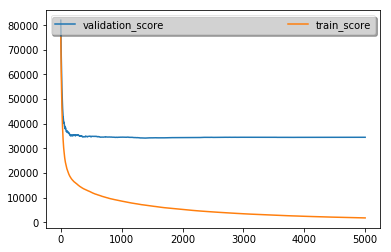

In [30]:
import matplotlib.pyplot as plt
import numpy as np


ax = plt.subplot(111)
plt.plot(x_axis, errors_val, label="validation_score")
plt.plot(x_axis, errors_train, label="train_score")

leg = plt.legend(loc='best', ncol=2, mode="expand", \
                 shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()

In [31]:
bst_n_estimators = np.argmin(errors_val)
print(bst_n_estimators, errors_val[bst_n_estimators])
print(rmse(y_val, lr.predict(X_val)))

1392 34142.55002361469
25202.009346587805


In [32]:
gbr = GradientBoostingRegressor(
        max_depth=2, n_estimators=500, subsample=0.5,\
    learning_rate=0.05)
X_train, X_val, y_train, y_val = \
    train_test_split(train_X, train_y, test_size=0.3)
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_val, y_val))


0.9768019880746742
0.8455881622438324


In [33]:
gbr_best = GradientBoostingRegressor(max_depth=2, \
                subsample=0.5,learning_rate=0.05, n_estimators=500)
gbr_best.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
test_y

269     148000
304     295000
1156    179900
1247    169900
871     200500
1229    127000
1183    120000
219     167240
651     108000
901     153000
225     112000
831     151000
1179     93000
843     141000
894     118858
118     320000
676      87000
1431    143750
518     211000
171     215000
719     128500
44      141000
701     140000
692     335000
160     162500
419     142000
1163    108959
1266    122000
1353    410000
957     132000
         ...  
165     127500
1287    190000
861     131500
823     139500
841     157500
1455    175000
751     162000
663     137500
296     152000
1172    171900
1362    104900
734     108000
109     190000
1231    132500
1085    147000
818     155000
0       208500
1145    149000
1350    200000
1089    197000
526     132000
1155    218000
1150    124000
822     225000
1309    179200
616     183200
1364    144152
1091    160000
197     235000
808     159950
Name: SalePrice, Length: 292, dtype: int64

In [35]:
id_value=test_y
sales_price = gbr_best.predict(test_X)

In [36]:
result = np.vstack([id_value, sales_price]).T

result

array([[148000.        , 149108.76668882],
       [295000.        , 364708.18222102],
       [179900.        , 181641.27593648],
       [169900.        , 145217.90463984],
       [200500.        , 181354.13859673],
       [127000.        , 136619.31429596],
       [120000.        , 140541.51019869],
       [167240.        , 181548.96813898],
       [108000.        , 112809.87897681],
       [153000.        , 143227.24885159],
       [112000.        ,  94388.24844696],
       [151000.        , 151847.01556565],
       [ 93000.        ,  96865.17484734],
       [141000.        ,  72938.01938838],
       [118858.        , 120694.25888984],
       [320000.        , 309442.97388622],
       [ 87000.        ,  81015.20393914],
       [143750.        , 136480.80483298],
       [211000.        , 184621.23396021],
       [215000.        , 187013.53375278],
       [128500.        , 139012.29320071],
       [141000.        , 133532.45319855],
       [140000.        , 157961.0736961 ],
       [335

In [37]:
from pandas import DataFrame

DataFrame(result, dtype=int, columns=["Id", "SalePrice"]).\
            set_index("Id").to_csv("house_price_result.csv")
# DataFrame(result, columns=["Id", "SalePrice"]).s\
#         et_index("Id").to_csv("house_price_result.csv")

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV 

param_grid={'n_estimators':[50, 100], 
                'learning_rate': [0.1, 0.05], #0.02, 0.01], 
                'subsample' : [0.4,0.5],#,0.6,0.7,0.8],
                'max_depth':[2, 4], #6 ,8], 
                'min_samples_leaf':[3, 5],#,9,15], 
                'max_features':[1.0, 0.3]#, 0.1] 
           } 
n_jobs=-1

estimator = GradientBoostingRegressor(warm_start=True)
cv = ShuffleSplit(X_train.shape[0],  test_size=0.2)
classifier = GridSearchCV(estimator=estimator, cv=cv, \
                          param_grid=param_grid, n_jobs=n_jobs, verbose=1)

classifier.fit(train_X, train_y)
print (classifier.best_estimator_)  

Fitting 817 folds for each of 64 candidates, totalling 52288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 7428 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 12628 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 15133 tasks      

In [ ]:
print(rmse(y_val, classifier.best_estimator_.predict(X_val)))

In [ ]:
print(rmse(y_val, classifier.predict(X_val)))

In [ ]:
final_estimator = classifier.best_estimator_
final_estimator.fit(train_X, train_y)

In [ ]:
print(rmse(y_val, final_estimator.predict(X_val)))

In [ ]:
print(final_estimator.score(X_train, y_train))

In [ ]:
print(final_estimator.score(X_val, y_val))

In [ ]:
id_value=test_y
sales_price = final_estimator.predict(test_X)
result = np.vstack([id_value, sales_price]).T
submission_df =DataFrame(result, columns=["Id", "SalePrice"]).set_index("Id")
submission_df.index = submission_df.index.astype(int)
submission_df.to_csv("house_price_result_grid_search.csv")
